# Descriptive Analysis

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st

In [83]:
def get_descriptive_stat(data):
    mean = st.mean(data)
    median = st.median(data)
    std_dev = st.stdev(data)
    variance = st.variance(data)

    return mean, median, std_dev, variance

def get_proportion(csdf):
    female_proportion = []
    schools = []

    # loop for every row in the csdf
    for index, row in csdf.iterrows():
        p = row['Female'] / row['Total']
        female_proportion.append(p)
        schools.append(row['School'])

    return female_proportion, schools

def get_graduates(grdf):
    graduates = []
    schools = []

    # loop for every row in the grdf
    for index, row in grdf.iterrows():
        graduates.append(row['gradTotal'])
        schools.append(row['School'])

    return graduates, schools

In [84]:
def draw_boxplot(data, title, ylabel, xlabel, savename):
    plt.boxplot(data)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    # plt.show()
    plt.savefig("plots/" + savename + ".png")
    plt.close()

In [85]:
def analyze_6(df, title, type):
    if type == "proportion":
        df_107_data, df_107_schools = get_proportion(df[df['Year'] == 107])
        df_108_data, df_108_schools = get_proportion(df[df['Year'] == 108])
        df_109_data, df_109_schools = get_proportion(df[df['Year'] == 109])
        df_110_data, df_110_schools = get_proportion(df[df['Year'] == 110])
        df_111_data, df_111_schools = get_proportion(df[df['Year'] == 111])
        df_112_data, df_112_schools = get_proportion(df[df['Year'] == 112])
    elif type == "number":
        df_107_data, df_107_schools = get_graduates(df[df['Year'] == 107])
        df_108_data, df_108_schools = get_graduates(df[df['Year'] == 108])
        df_109_data, df_109_schools = get_graduates(df[df['Year'] == 109])
        df_110_data, df_110_schools = get_graduates(df[df['Year'] == 110])
        df_111_data, df_111_schools = get_graduates(df[df['Year'] == 111])
        df_112_data, df_112_schools = get_graduates(df[df['Year'] == 112])

    df_107_mean, df_107_median, df_107_std, df_107_var = get_descriptive_stat(df_107_data)
    df_108_mean, df_108_median, df_108_std, df_108_var = get_descriptive_stat(df_108_data)
    df_109_mean, df_109_median, df_109_std, df_109_var = get_descriptive_stat(df_109_data)
    df_110_mean, df_110_median, df_110_std, df_110_var = get_descriptive_stat(df_110_data)
    df_111_mean, df_111_median, df_111_std, df_111_var = get_descriptive_stat(df_111_data)
    df_112_mean, df_112_median, df_112_std, df_112_var = get_descriptive_stat(df_112_data)

    print("Descriptive statistics for", title, "from 107 to 112")
    print(f"Data points: {len(df_107_data)}; {len(df_112_data)}")
    print(f"Mean: {df_107_mean}; {df_112_mean}")
    print(f"Median: {df_107_median}; {df_112_median}")
    print(f"Standard Deviation: {df_107_std}; {df_112_std}")
    print(f"Variance: {df_107_var}; {df_112_var}")

    means = [df_107_mean, df_108_mean, df_109_mean, df_110_mean, df_111_mean, df_112_mean]
    medians = [df_107_median, df_108_median, df_109_median, df_110_median, df_111_median, df_112_median]

    # draw boxplot for 107-112
    if type == "proportion":
        draw_boxplot(df_107_data, "sex ratio: " + title + " in 107", "Proportion", "School", "sex_ratio_107_" + title)
        draw_boxplot(df_112_data, "sex ratio: " + title + " in 112", "Proportion", "School", "sex_ratio_112_" + title)
    elif type == "number":
        draw_boxplot(df_107_data, "Graduated master students: " + title + " in 107", "Number of Graduates", "School", "graduates_107_" + title)
        draw_boxplot(df_112_data, "Graduated master students: " + title + " in 112", "Number of Graduates", "School", "graduates_112_" + title)

    return means, medians

def analyze_10(df, title, type):
    if type == "proportion":
        df_103_data, df_103_schools = get_proportion(df[df['Year'] == 103])
        df_104_data, df_104_schools = get_proportion(df[df['Year'] == 104])
        df_105_data, df_105_schools = get_proportion(df[df['Year'] == 105])
        df_106_data, df_106_schools = get_proportion(df[df['Year'] == 106])
        df_107_data, df_107_schools = get_proportion(df[df['Year'] == 107])
        df_108_data, df_108_schools = get_proportion(df[df['Year'] == 108])
        df_109_data, df_109_schools = get_proportion(df[df['Year'] == 109])
        df_110_data, df_110_schools = get_proportion(df[df['Year'] == 110])
        df_111_data, df_111_schools = get_proportion(df[df['Year'] == 111])
        df_112_data, df_112_schools = get_proportion(df[df['Year'] == 112])
    elif type == "number":
        df_103_data, df_103_schools = get_graduates(df[df['Year'] == 103])
        df_104_data, df_104_schools = get_graduates(df[df['Year'] == 104])
        df_105_data, df_105_schools = get_graduates(df[df['Year'] == 105])
        df_106_data, df_106_schools = get_graduates(df[df['Year'] == 106])
        df_107_data, df_107_schools = get_graduates(df[df['Year'] == 107])
        df_108_data, df_108_schools = get_graduates(df[df['Year'] == 108])
        df_109_data, df_109_schools = get_graduates(df[df['Year'] == 109])
        df_110_data, df_110_schools = get_graduates(df[df['Year'] == 110])
        df_111_data, df_111_schools = get_graduates(df[df['Year'] == 111])
        df_112_data, df_112_schools = get_graduates(df[df['Year'] == 112])

    df_103_mean, df_103_median, df_103_std, df_103_var = get_descriptive_stat(df_103_data)
    df_104_mean, df_104_median, df_104_std, df_104_var = get_descriptive_stat(df_104_data)
    df_105_mean, df_105_median, df_105_std, df_105_var = get_descriptive_stat(df_105_data)
    df_106_mean, df_106_median, df_106_std, df_106_var = get_descriptive_stat(df_106_data)
    df_107_mean, df_107_median, df_107_std, df_107_var = get_descriptive_stat(df_107_data)
    df_108_mean, df_108_median, df_108_std, df_108_var = get_descriptive_stat(df_108_data)
    df_109_mean, df_109_median, df_109_std, df_109_var = get_descriptive_stat(df_109_data)
    df_110_mean, df_110_median, df_110_std, df_110_var = get_descriptive_stat(df_110_data)
    df_111_mean, df_111_median, df_111_std, df_111_var = get_descriptive_stat(df_111_data)
    df_112_mean, df_112_median, df_112_std, df_112_var = get_descriptive_stat(df_112_data)

    print("Descriptive statistics for", title, "from 103 to 112")
    print(f"Data points: {len(df_103_data)}; {len(df_112_data)}")
    print(f"Mean: {df_103_mean}; {df_112_mean}")
    print(f"Median: {df_103_median}; {df_112_median}")
    print(f"Standard Deviation: {df_103_std}; {df_112_std}")
    print(f"Variance: {df_103_var}; {df_112_var}")

    means = [df_103_mean, df_104_mean, df_105_mean, df_106_mean, df_107_mean, df_108_mean, df_109_mean, df_110_mean, df_111_mean, df_112_mean]
    medians = [df_103_median, df_104_median, df_105_median, df_106_median, df_107_median, df_108_median, df_109_median, df_110_median, df_111_median, df_112_median]

    # draw boxplot for 103-112
    if type == "proportion":
        draw_boxplot(df_103_data, "sex ratio: " + title + " in 103", "Proportion", "School", "sex_ratio_103_" + title)
        draw_boxplot(df_112_data, "sex ratio: " + title + " in 112", "Proportion", "School", "sex_ratio_112_" + title)
    elif type == "number":
        draw_boxplot(df_103_data, "Graduated master students: " + title + " in 103", "Number of Graduates", "School", "graduates_103_" + title)
        draw_boxplot(df_112_data, "Graduated master students: " + title + " in 112", "Number of Graduates", "School", "graduates_112_" + title)

    return means, medians

## 1. How the proportion of women studying in Computer Science changes along the time?

In [86]:
csdf = pd.read_csv('data/data/cs_students(10).csv')
csdf.head()

,Year,School,Total,Male,Female,Type,Ownership
0,103,中原大學,442,372,70,General,Private
1,103,中國文化大學,459,396,63,General,Private
2,103,中國科技大學,178,170,8,Tech,Private
3,103,中華大學,393,341,52,General,Private
4,103,中華科技大學,348,316,32,Tech,Private


In [87]:
print(csdf.describe())
print("Total number of row: ", len(csdf))

             Year        Total        Male      Female
count  662.000000   662.000000  662.000000  662.000000
mean   107.483384   342.569486  290.335347   52.234139
std      2.864916   182.024355  151.001826   42.877631
min    103.000000     1.000000    1.000000    0.000000
25%    105.000000   202.000000  168.250000   20.000000
50%    107.000000   305.500000  271.500000   39.000000
75%    110.000000   459.000000  388.500000   72.750000
max    112.000000  1043.000000  828.000000  247.000000
Total number of row:  662


In [88]:
overall_means_6, overall_medians_6 = analyze_6(csdf, "Overall", "proportion")
print("----------------------------------------")
overall_means_10, overall_medians_10 = analyze_10(csdf, "Overall", "proportion")

Descriptive statistics for Overall from 107 to 112
Data points: 67; 65
Mean: 0.13477746271721044; 0.17407892604939765
Median: 0.128; 0.17633928571428573
Standard Deviation: 0.06855268548318781; 0.07435754029504264
Variance: 0.00469947068695687; 0.00552904379872889
----------------------------------------
Descriptive statistics for Overall from 103 to 112
Data points: 65; 65
Mean: 0.11807921749201196; 0.17407892604939765
Median: 0.1111111111111111; 0.17633928571428573
Standard Deviation: 0.06260490251204147; 0.07435754029504264
Variance: 0.003919373818542216; 0.00552904379872889


In [89]:
# 4 categories: (General, Public), (General, Private), (Tech, Public), (Tech, Private)
GenPub = csdf[(csdf['Type'] == 'General') & (csdf['Ownership'] == "Public")]
GenPri = csdf[(csdf['Type'] == 'General') & (csdf['Ownership'] == "Private")]
TecPub = csdf[(csdf['Type'] == 'Tech') & (csdf['Ownership'] == "Public")]
TecPri = csdf[(csdf['Type'] == 'Tech') & (csdf['Ownership'] == "Private")]

In [90]:
# General Public
GenPub_means_6, GenPub_medians_6 = analyze_6(GenPub, "General Public", "proportion")
print("----------------------------------------")
GenPub_means_10, GenPub_medians_10 = analyze_10(GenPub, "General Public", "proportion")

Descriptive statistics for General Public from 107 to 112
Data points: 22; 23
Mean: 0.18806324212459574; 0.22024074892477066
Median: 0.19681362712684974; 0.2135678391959799
Standard Deviation: 0.03854424961559331; 0.04599962261965814
Variance: 0.001485659178429165; 0.002115965281150965
----------------------------------------
Descriptive statistics for General Public from 103 to 112
Data points: 21; 23
Mean: 0.18067314038554505; 0.22024074892477066
Median: 0.1746031746031746; 0.2135678391959799
Standard Deviation: 0.03568369345722074; 0.04599962261965814
Variance: 0.0012733259787488984; 0.002115965281150965


In [91]:
# General Private
GenPri_means_6, GenPri_medians_6 = analyze_6(GenPri, "General Private", "proportion")
print("----------------------------------------")
GenPri_means_10, GenPri_medians_10 = analyze_10(GenPri, "General Private", "proportion")

Descriptive statistics for General Private from 107 to 112
Data points: 18; 18
Mean: 0.16819386337942305; 0.2137903534088632
Median: 0.16357540402515097; 0.20258307210031348
Standard Deviation: 0.05409858482773544; 0.06390164683957127
Variance: 0.002926656880363687; 0.004083420468809288
----------------------------------------
Descriptive statistics for General Private from 103 to 112
Data points: 14; 18
Mean: 0.14294559661289374; 0.2137903534088632
Median: 0.1389149909164944; 0.20258307210031348
Standard Deviation: 0.03812152613146123; 0.06390164683957127
Variance: 0.001453250754591681; 0.004083420468809288


In [92]:
# Tech Public
TecPub_means_6, TecPub_medians_6 = analyze_6(TecPub, "Tech Public", "proportion")
print("----------------------------------------")
TecPub_means_10, TecPub_medians_10 = analyze_10(TecPub, "Tech Public", "proportion")

Descriptive statistics for Tech Public from 107 to 112
Data points: 7; 8
Mean: 0.09430542486580698; 0.11693152361531407
Median: 0.09322033898305085; 0.12057165861513687
Standard Deviation: 0.026743150704289502; 0.032488648970467
Variance: 0.0007151961095923401; 0.0010555123119262264
----------------------------------------
Descriptive statistics for Tech Public from 103 to 112
Data points: 8; 8
Mean: 0.08770382183660903; 0.11693152361531407
Median: 0.08672868940608323; 0.12057165861513687
Standard Deviation: 0.01822330432814595; 0.032488648970467
Variance: 0.0003320888206362229; 0.0010555123119262264


In [93]:
# Tech Private
TecPri_means_6, TecPri_medians_6 = analyze_6(TecPri, "Tech Private", "proportion")
print("----------------------------------------")
TecPri_means_10, TecPri_medians_10 = analyze_10(TecPri, "Tech Private", "proportion")

Descriptive statistics for Tech Private from 107 to 112
Data points: 20; 16
Mean: 0.0602535580210865; 0.091619651103692
Median: 0.054215234480889135; 0.09104010025062656
Standard Deviation: 0.032292814336185714; 0.03481833015093211
Variance: 0.0010428258577513613; 0.0012123161144993078
----------------------------------------
Descriptive statistics for Tech Private from 103 to 112
Data points: 22; 16
Mean: 0.05355201189140668; 0.091619651103692
Median: 0.04551710649271625; 0.09104010025062656
Standard Deviation: 0.02603823378793482; 0.03481833015093211
Variance: 0.0006779896187951505; 0.0012123161144993078


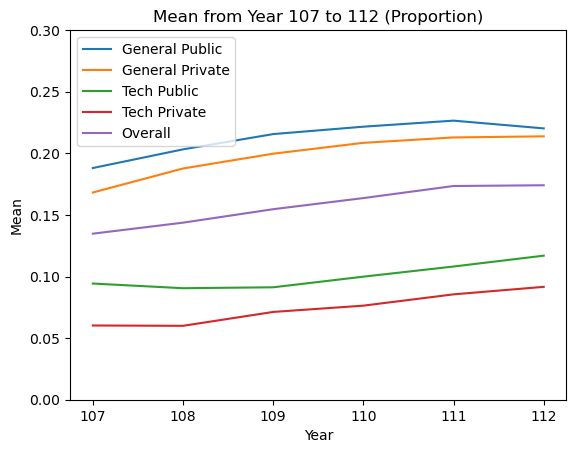

In [94]:
# plot with all means: 107-112
y = [107, 108, 109, 110, 111, 112]
plt.plot(y, GenPub_means_6, label='General Public')
plt.plot(y, GenPri_means_6, label='General Private')
plt.plot(y, TecPub_means_6, label='Tech Public')
plt.plot(y, TecPri_means_6, label='Tech Private')
plt.plot(y, overall_means_6, label='Overall')
plt.ylim(0, 0.3)
plt.title("Mean from Year 107 to 112 (Proportion)")
plt.xlabel('Year')
plt.ylabel('Mean')
plt.legend()
plt.savefig("plots/mean_proportion_107-112.png")
plt.show()

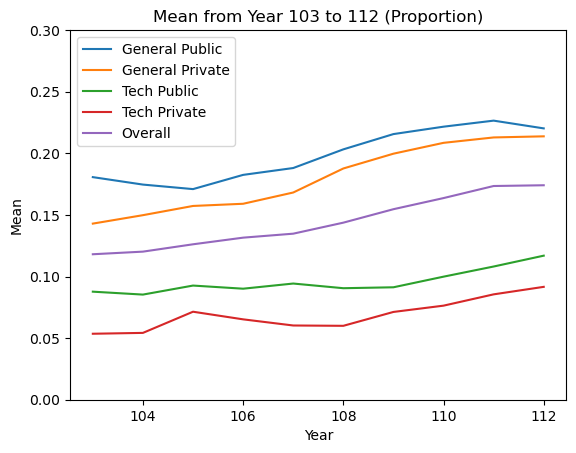

In [95]:
# plot with all means: 103-112
y = [103, 104, 105, 106, 107, 108, 109, 110, 111, 112]
plt.plot(y, GenPub_means_10, label='General Public')
plt.plot(y, GenPri_means_10, label='General Private')
plt.plot(y, TecPub_means_10, label='Tech Public')
plt.plot(y, TecPri_means_10, label='Tech Private')
plt.plot(y, overall_means_10, label='Overall')
plt.ylim(0, 0.3)
plt.title("Mean from Year 103 to 112 (Proportion)")
plt.xlabel('Year')
plt.ylabel('Mean')
plt.legend()
plt.savefig("plots/mean_proportion_103-112.png")
plt.show()

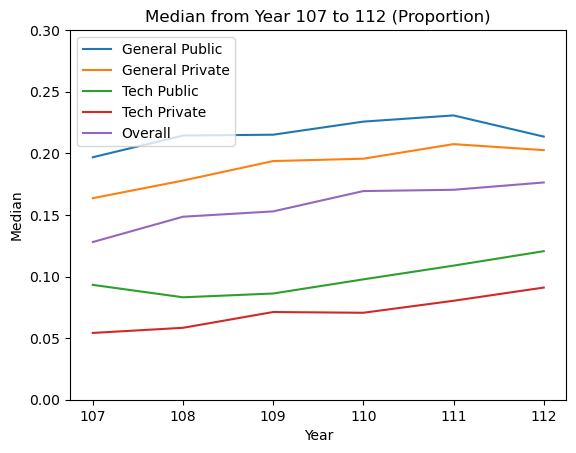

In [96]:
# plot with all medians: 107-112
y = [107, 108, 109, 110, 111, 112]
plt.plot(y, GenPub_medians_6, label='General Public')
plt.plot(y, GenPri_medians_6, label='General Private')
plt.plot(y, TecPub_medians_6, label='Tech Public')
plt.plot(y, TecPri_medians_6, label='Tech Private')
plt.plot(y, overall_medians_6, label='Overall')
plt.ylim(0, 0.3)
plt.title("Median from Year 107 to 112 (Proportion)")
plt.xlabel('Year')
plt.ylabel('Median')
plt.legend()
plt.savefig("plots/median_proportion_107-112.png")
plt.show()


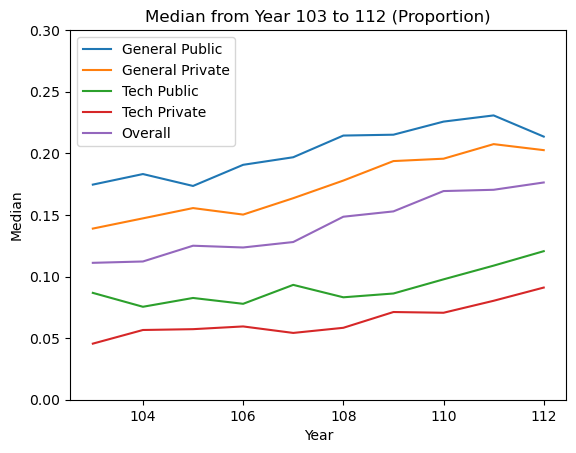

In [97]:
# plot with all medians: 103-112
y = [103, 104, 105, 106, 107, 108, 109, 110, 111, 112]
plt.plot(y, GenPub_medians_10, label='General Public')
plt.plot(y, GenPri_medians_10, label='General Private')
plt.plot(y, TecPub_medians_10, label='Tech Public')
plt.plot(y, TecPri_medians_10, label='Tech Private')
plt.plot(y, overall_medians_10, label='Overall')
plt.ylim(0, 0.3)
plt.title("Median from Year 103 to 112 (Proportion)")
plt.xlabel('Year')
plt.ylabel('Median')
plt.legend()
plt.savefig("plots/median_proportion_103-112.png")
plt.show()


## 2. How the number of graduated master students changes along the time?

In [98]:
grdf = pd.read_csv('data/data/graduates(10).csv')
grdf.head()

,Year,School,gradTotal,Type,Ownership
0,103,世新大學,267,General,Private
1,103,中原大學,706,General,Private
2,103,中國文化大學,509,General,Private
3,103,中國科技大學,48,Tech,Private
4,103,中國醫藥大學,214,General,Private


In [99]:
overallg_means_6, overallg_medians_6 = analyze_6(grdf, "Overall", "number")
print("----------------------------------------")
overallg_means_10, overallg_medians_10 = analyze_10(grdf, "Overall", "number")

Descriptive statistics for Overall from 107 to 112
Data points: 133; 125
Mean: 288.98496240601503; 303.84
Median: 112; 109
Standard Deviation: 500.96118196199967; 536.5012310962035
Variance: 250962.10583276371; 287833.57096774195
----------------------------------------
Descriptive statistics for Overall from 103 to 112
Data points: 127; 125
Mean: 331.6062992125984; 303.84
Median: 139; 109
Standard Deviation: 517.1917478914268; 536.5012310962035
Variance: 267487.30408698914; 287833.57096774195


In [100]:
GenPub_gr = grdf[(grdf['Type'] == 'General') & (grdf['Ownership'] == "Public")]
GenPri_gr = grdf[(grdf['Type'] == 'General') & (grdf['Ownership'] == "Private")]
TecPub_gr = grdf[(grdf['Type'] == 'Tech') & (grdf['Ownership'] == "Public")]
TecPri_gr = grdf[(grdf['Type'] == 'Tech') & (grdf['Ownership'] == "Private")]

In [101]:
# General Public
GenPubg_means_6, GenPubg_medians_6 = analyze_6(GenPub_gr, "General Public", "number")
print("----------------------------------------")
GenPubg_means_10, GenPubg_medians_10 = analyze_10(GenPub_gr, "General Public", "number")

Descriptive statistics for General Public from 107 to 112
Data points: 31; 31
Mean: 703.5806451612904; 720.1290322580645
Median: 301; 295
Standard Deviation: 826.3257135937599; 864.004002380216
Variance: 682814.1849462365; 746502.9161290323
----------------------------------------
Descriptive statistics for General Public from 103 to 112
Data points: 31; 31
Mean: 741.4193548387096; 720.1290322580645
Median: 367; 295
Standard Deviation: 820.7034695590341; 864.004002380216
Variance: 673554.1849462365; 746502.9161290323


In [102]:
# General Private
GenPrig_means_6, GenPrig_medians_6 = analyze_6(GenPri_gr, "General Private", "number")
print("----------------------------------------")
GenPrig_means_10, GenPrig_medians_10 = analyze_10(GenPri_gr, "General Private", "number")

Descriptive statistics for General Private from 107 to 112
Data points: 36; 34
Mean: 219.80555555555554; 207.3235294117647
Median: 187.5; 161.5
Standard Deviation: 182.6721996902718; 171.19078858471528
Variance: 33369.13253968254; 29306.286096256685
----------------------------------------
Descriptive statistics for General Private from 103 to 112
Data points: 34; 34
Mean: 279.94117647058823; 207.3235294117647
Median: 237.5; 161.5
Standard Deviation: 209.82343821131232; 171.19078858471528
Variance: 44025.8752228164; 29306.286096256685


In [103]:
# Tech Public
TecPubg_means_6, TecPubg_medians_6 = analyze_6(TecPub_gr, "Tech Public", "number")
print("----------------------------------------")
TecPubg_means_10, TecPubg_medians_10 = analyze_10(TecPub_gr, "Tech Public", "number")

Descriptive statistics for Tech Public from 107 to 112
Data points: 12; 12
Mean: 474.0833333333333; 511.6666666666667
Median: 312.0; 329.5
Standard Deviation: 471.47996358340197; 516.6362063357249
Variance: 222293.35606060605; 266912.9696969697
----------------------------------------
Descriptive statistics for Tech Public from 103 to 112
Data points: 12; 12
Mean: 526.75; 511.6666666666667
Median: 393.5; 329.5
Standard Deviation: 473.25509650043534; 516.6362063357249
Variance: 223970.38636363635; 266912.9696969697


In [104]:
# Tech Private
TecPrig_means_6, TecPrig_medians_6 = analyze_6(TecPri_gr, "Tech Private", "number")
print("----------------------------------------")
TecPrig_means_10, TecPrig_medians_10 = analyze_10(TecPri_gr, "Tech Private", "number")

Descriptive statistics for Tech Private from 107 to 112
Data points: 54; 48
Mean: 55.96296296296296; 51.395833333333336
Median: 35.0; 35.5
Standard Deviation: 59.123140750363405; 51.973290842440484
Variance: 3495.5457721872817; 2701.2229609929077
----------------------------------------
Descriptive statistics for Tech Private from 103 to 112
Data points: 48; 48
Mean: 68.33333333333333; 51.395833333333336
Median: 41.5; 35.5
Standard Deviation: 78.06961795876134; 51.973290842440484
Variance: 6094.86524822695; 2701.2229609929077


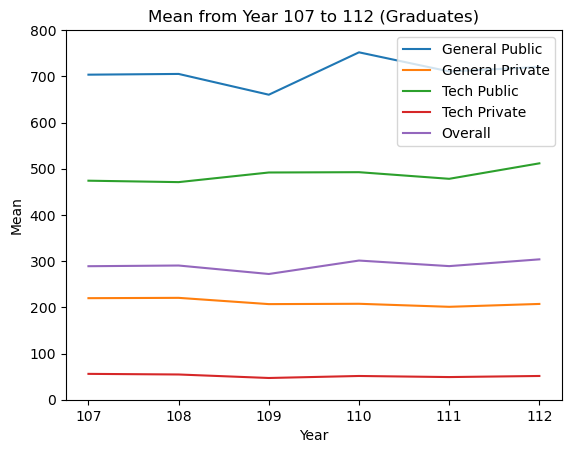

In [105]:
# plot with all means: 107-112
y = [107, 108, 109, 110, 111, 112]
plt.plot(y, GenPubg_means_6, label='General Public')
plt.plot(y, GenPrig_means_6, label='General Private')
plt.plot(y, TecPubg_means_6, label='Tech Public')
plt.plot(y, TecPrig_means_6, label='Tech Private')
plt.plot(y, overallg_means_6, label='Overall')
plt.ylim(0, 800)
plt.title("Mean from Year 107 to 112 (Graduates)")
plt.xlabel('Year')
plt.ylabel('Mean')
plt.legend()
plt.savefig("plots/mean_graduates_107-112.png")
plt.show()

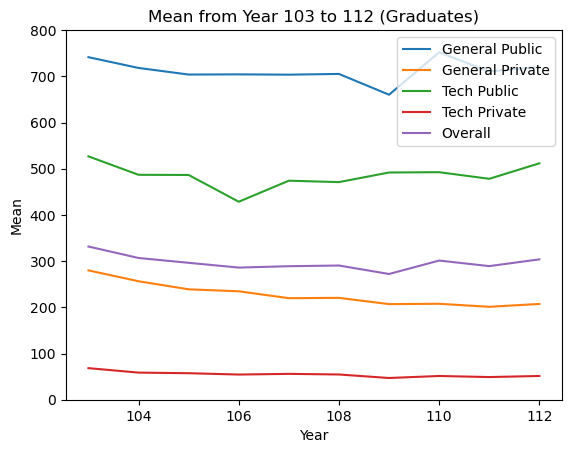

In [106]:
# plot with all means: 103-112
y = [103, 104, 105, 106, 107, 108, 109, 110, 111, 112]
plt.plot(y, GenPubg_means_10, label='General Public')
plt.plot(y, GenPrig_means_10, label='General Private')
plt.plot(y, TecPubg_means_10, label='Tech Public')
plt.plot(y, TecPrig_means_10, label='Tech Private')
plt.plot(y, overallg_means_10, label='Overall')
plt.ylim(0, 800)
plt.title("Mean from Year 103 to 112 (Graduates)")
plt.xlabel('Year')
plt.ylabel('Mean')
plt.legend()
plt.savefig("plots/mean_graduates_103-112.png")
plt.show()

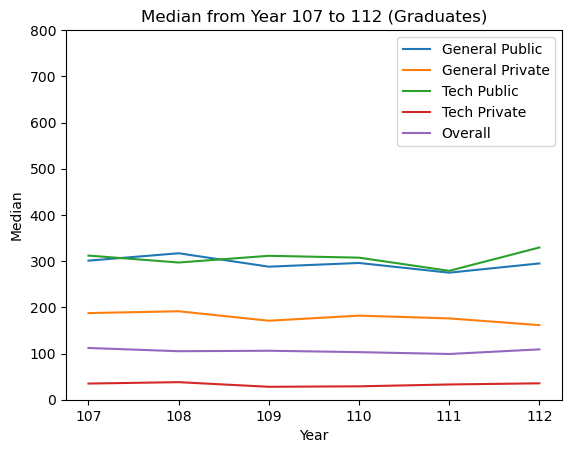

In [107]:
# plot with all medians: 107-112
y = [107, 108, 109, 110, 111, 112]
plt.plot(y, GenPubg_medians_6, label='General Public')
plt.plot(y, GenPrig_medians_6, label='General Private')
plt.plot(y, TecPubg_medians_6, label='Tech Public')
plt.plot(y, TecPrig_medians_6, label='Tech Private')
plt.plot(y, overallg_medians_6, label='Overall')
plt.ylim(0, 800)
plt.title("Median from Year 107 to 112 (Graduates)")
plt.xlabel('Year')
plt.ylabel('Median')
plt.legend()
plt.savefig("plots/median_graduates_107-112.png")
plt.show()

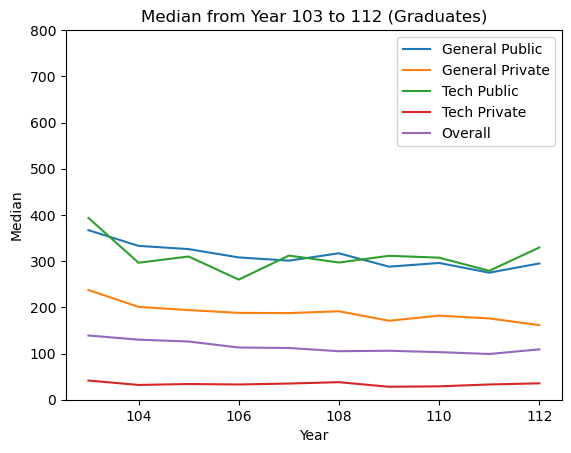

In [108]:
# plot with all medians: 103-112
y = [103, 104, 105, 106, 107, 108, 109, 110, 111, 112]
plt.plot(y, GenPubg_medians_10, label='General Public')
plt.plot(y, GenPrig_medians_10, label='General Private')
plt.plot(y, TecPubg_medians_10, label='Tech Public')
plt.plot(y, TecPrig_medians_10, label='Tech Private')
plt.plot(y, overallg_medians_10, label='Overall')
plt.ylim(0, 800)
plt.title("Median from Year 103 to 112 (Graduates)")
plt.xlabel('Year')
plt.ylabel('Median')
plt.legend()
plt.savefig("plots/median_graduates_103-112.png")
plt.show()